In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 3.0)

# Aufgabe 2.1

In [2]:
def tanh_exact(x):
    y = np.exp( 2 * x )
    return (y - 1) / (y + 1)
def tanh_taylor(x):
    return x - x**3/3 + 2*x**5/15 - 17*x**7/315

def runtime(func, x_all):
    t0 = time.time()
    for x in x_all:
        tanh_exact(x)
    return time.time() - t0

n = 100000
x_all = np.linspace(0,1, n)
print("Runtime of %i times. The approache with sinh(x)/cosh(x)\
 needs %.3f secunds and the approache with Taylor series %.3f secunds" %( 
    n,
    runtime(tanh_exact, x_all), 
    runtime(tanh_taylor, x_all))
     )

Runtime of 100000 times. The approache with sinh(x)/cosh(x) needs 0.213 secunds and the approache with Taylor series 0.218 secunds


# Aufgabe 2.2
Analytical we get the result:
$\sum_n^\infty\frac{2n + 1}{n^2 (n + 1)^2}$ = 1

To reach an accuracy of 10^−5 we need 318 terms.


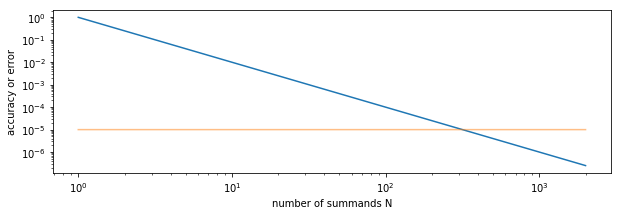

In [3]:
def func(N):   
    return sum([ (2 * n + 1) / (n**2 * (n + 1)**2) for n in range(1,N) ])
n_rang = np.arange(1,2000)
plt.plot(n_rang, [ 1 - func(N) for N in n_rang])
plt.plot(n_rang, 1e-5 + 0*(n_rang), alpha = 0.5)
plt.xlabel("number of summands N")
plt.ylabel("accuracy or error")
plt.loglog()

accuracy, N = 1, 0
while accuracy >= 1e-5:
    accuracy = 1 - func(N)
    N += 1
print("To reach an accuracy of 10^−5 we need %i terms."%N)

# Aufgabe 2.3


In [109]:
def iteration1(x_0, N):
    n = 0
    x_n = x_0
    while n<=N+1:
        x_n_p_1 = 4 * x_n * (1 - x_n)
        x_n = x_n_p_1
        n += 1
    return x_n_p_1

def iteration2(ϕ_0, N):
    n = 0
    ϕ_n = ϕ_0
    while n<=N+1:
        ϕ_n_p_1 = 1 - 2 * abs(ϕ_n - 1/2)
        ϕ_n = ϕ_n_p_1
        n += 1
    return ϕ_n_p_1

In [117]:
N_range = np.arange(0,15)
x_range = np.linspace(0,1, 80)
x_range = np.sin( np.pi / 2 * np.linspace(0,1, 80))
ϕ_range = np.linspace(0,1, 80)
chaotic_map1 = np.array([np.array([iteration1(x_0, N) for N in N_range]) for x_0 in x_range ])
chaotic_map2 = np.array([np.array([iteration2(ϕ_0, N) for N in N_range]) for ϕ_0 in ϕ_range ])

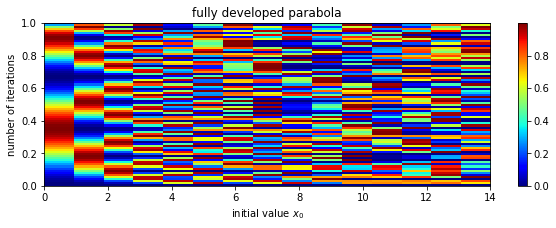

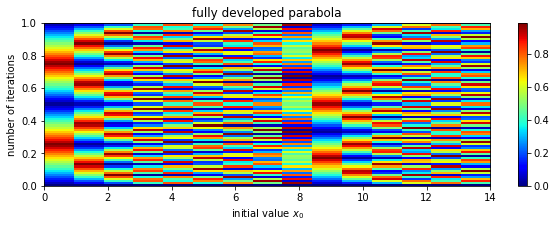

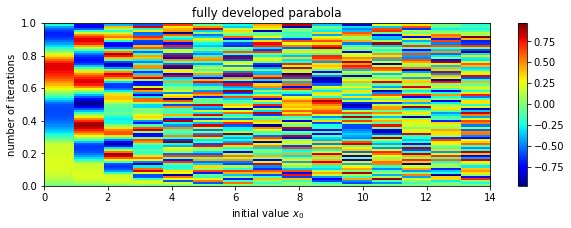

In [118]:
plt.imshow(chaotic_map1,cmap='jet', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()
plt.imshow(chaotic_map2,cmap='jet', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()
plt.imshow(chaotic_map2-chaotic_map1,cmap='jet', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()

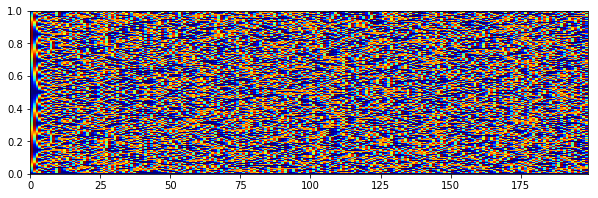

(array([ 270.,  102.,   94.,   70.,   76.,   64.,  100.,   78.,  104.,  242.]),
 array([ 0.        ,  0.1       ,  0.2       ,  0.29999999,  0.39999999,
         0.49999999,  0.59999999,  0.69999998,  0.79999998,  0.89999998,
         0.99999998]),
 <a list of 10 Patch objects>)

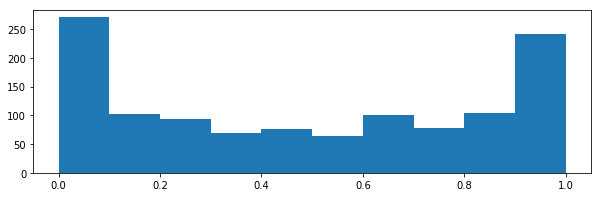

In [105]:
liste = np.reshape(chaotic_map, chaotic_map.shape[0]*chaotic_map.shape[1])
plt.hist(liste)